<a href="https://colab.research.google.com/github/jcj217-mc/Data_205_Final_Project/blob/main/Data205_Project_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [ ]:
# .json file data imported as pandas data frame
df = pd.read_json('https://data.montgomerycountymd.gov/resource/usip-62e2.json')

In [ ]:
# Evaluating initial data 
df

,filenum,created_dt,source,allegation,incident_status,finding
0,15-0200,2015-11-09T00:00:00.000,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN
1,16-0101,2016-05-10T00:00:00.000,Internal,Use of Force,Active,NaN
2,16-0101,2016-05-10T00:00:00.000,Internal,Abuse of Authority,Active,NaN
3,16-0101,2016-05-10T00:00:00.000,Internal,Conformance to Law,Active,NaN
4,15-0200,2015-11-09T00:00:00.000,External,Courtesy,Active,NaN
...,...,...,...,...,...,...
995,15-0014,2015-02-03T00:00:00.000,External,Conformance to Law,Completed,Corrective Action Taken
996,15-0152,2015-08-20T00:00:00.000,External,Courtesy,Completed,Corrective Action Taken
997,15-0009,2015-01-23T00:00:00.000,External,Courtesy,Completed,Corrective Action Taken
998,13-0242,2013-09-09T00:00:00.000,External,Conf T/L Traffic,Completed,No Corrective Action Tak


In [ ]:
# Changing Date to datetime
df.created_dt = pd.to_datetime(df.created_dt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filenum          1000 non-null   object        
 1   created_dt       1000 non-null   datetime64[ns]
 2   source           1000 non-null   object        
 3   allegation       997 non-null    object        
 4   incident_status  1000 non-null   object        
 5   finding          822 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 47.0+ KB


In [ ]:
# add a column for Year
df['Year'] = df['created_dt'].dt.year
df.head(1)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015


In [ ]:
df.Year.min()

2013

In [ ]:
df.Year.max()

2021

In [ ]:
df.incident_status.unique()

array(['Active', 'Completed'], dtype=object)

In [ ]:
df.finding.unique()

array([nan, 'Administrative Closure', 'Declined', 'Unfounded',
       'Exonerated', 'No Corrective Action Tak',
       'Corrective Action Taken', 'Sustained', 'Insufficent Evidence',
       'Policy Failure'], dtype=object)

In [ ]:
df.describe()

,Year
count,1000.000000
mean,2015.272000
std,2.408281
min,2013.000000
25%,2014.000000
50%,2014.000000
75%,2015.000000
max,2021.000000


In [ ]:
df.allegation.unique()

array(['Neglect of Duty/Unsatisfactory Performance', 'Use of Force',
       'Abuse of Authority', 'Conformance to Law', 'Courtesy',
       'Conduct Unbecoming', 'Att to Duty/Use Alch-Drugs',
       'Discrimination/Harassment', 'Discrim/Race/Sex',
       'Abuse of Process', 'Ineffective Police Action',
       'Carry Credent/Identification', 'Untruthful Statements',
       'Secondary Employment', 'Property', 'Punctuality',
       'Compliance with Orders', 'Maintenance of Property',
       'Conf T/L Traffic', 'Absent W/O Leave', 'courtesy',
       'Use of Force (Count two)', 'Conformance to Law (Count two)', nan,
       'Neglect of Duty', 'Conformance to Law Re: Criminal',
       'Conformance to Law Deadly Force', 'conduct unbecoming',
       'Neglect of Duty/Unsatisfactory Performance (Count three)',
       'Carry ID on Duty&OD While Armed',
       'Neglect of Duty/Unsatisfactory Performance (Count two)',
       'Use of Force (Count three)'], dtype=object)

In [ ]:
df_allegation = pd.DataFrame(df.allegation.value_counts())
df_allegation

,allegation
Neglect of Duty/Unsatisfactory Performance,315
Courtesy,169
Conformance to Law,156
Conduct Unbecoming,96
Use of Force,56
Conf T/L Traffic,38
Abuse of Authority,31
Untruthful Statements,20
Discrimination/Harassment,16
Maintenance of Property,12


In [ ]:
# Successfully creating excel sheet with cell output
#df_allegation.to_excel("./allegationdf.xlsx")

In [ ]:
df_findings = pd.DataFrame(df.finding.value_counts())
df_findings

,finding
No Corrective Action Tak,276
Corrective Action Taken,170
Administrative Closure,125
Exonerated,77
Sustained,63
Declined,47
Unfounded,40
Insufficent Evidence,22
Policy Failure,2


In [ ]:
# Successfully creating excel sheet with cell output
#df_findings.to_excel("./findingsdf.xlsx")

In [ ]:
findingsdf = pd.read_csv('findingsdf.csv')

In [ ]:
findingsdf.head()

,Finding,Count
0,No Corrective Action Tak,279
1,Corrective Action Taken,170
2,Administrative Closure,127
3,Exonerated,77
4,Sustained,65


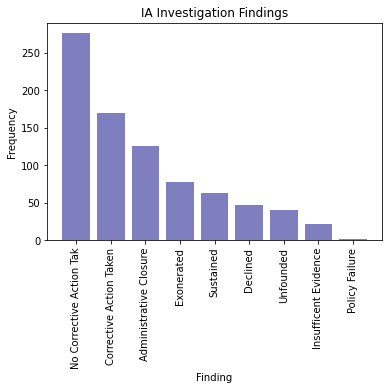

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.bar(df_findings.index, df_findings.finding, facecolor='navy', alpha=0.5, )
plt.title('IA Investigation Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.savefig('AI_findings.png', dpi=300, bbox_inches = 'tight')

plt.show()

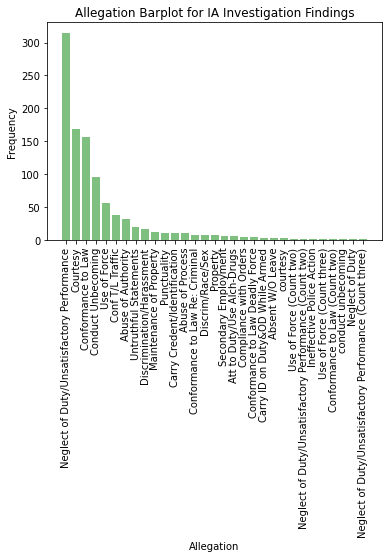

In [ ]:
plt.bar(df_allegation.index, df_allegation.allegation, facecolor='green', alpha=0.5, )
plt.title('Allegation Barplot for IA Investigation Findings')
plt.xlabel('Allegation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

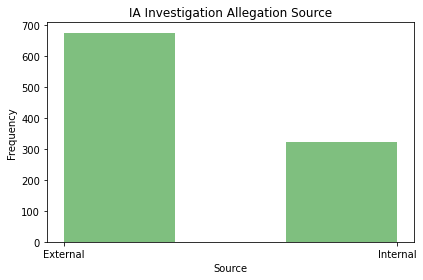

In [ ]:
plt.hist(df.source, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Allegation Source')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.source.value_counts()

External    676
Internal    324
Name: source, dtype: int64

In [ ]:
318+682

1000

In [ ]:
318/1000 * 100
682/1000 * 100

68.2

In [ ]:
df.head(10)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
3,16-0101,2016-05-10,Internal,Conformance to Law,Active,NaN,2016
4,15-0200,2015-11-09,External,Courtesy,Active,NaN,2015
5,15-0200,2015-11-09,External,Conduct Unbecoming,Active,NaN,2015
6,16-0101,2016-05-10,Internal,Att to Duty/Use Alch-Drugs,Active,NaN,2016
7,16-0196,2016-08-17,Internal,Conformance to Law,Active,NaN,2016
8,16-0196,2016-08-17,Internal,Conduct Unbecoming,Active,NaN,2016
9,19-0093,2019-06-10,External,Courtesy,Active,Administrative Closure,2019


In [ ]:
df.finding.value_counts()

No Corrective Action Tak    276
Corrective Action Taken     170
Administrative Closure      125
Exonerated                   77
Sustained                    63
Declined                     47
Unfounded                    40
Insufficent Evidence         22
Policy Failure                2
Name: finding, dtype: int64

In [ ]:
df.finding.isnull().sum()

178

In [ ]:
df.allegation.value_counts()

Neglect of Duty/Unsatisfactory Performance                  315
Courtesy                                                    169
Conformance to Law                                          156
Conduct Unbecoming                                           96
Use of Force                                                 56
Conf T/L Traffic                                             38
Abuse of Authority                                           31
Untruthful Statements                                        20
Discrimination/Harassment                                    16
Maintenance of Property                                      12
Punctuality                                                  10
Carry Credent/Identification                                 10
Abuse of Process                                             10
Conformance to Law Re: Criminal                               8
Discrim/Race/Sex                                              8
Property                                

In [ ]:
#year and corrective
#df_corrective = df.groupby["Year"]['finding']
#df_corrective.head()

In [ ]:
df_corrective=df[(df['finding']=="Corrective Action Taken")]
df_corrective.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
155,20-0216,2020-12-21,External,Conformance to Law,Active,Corrective Action Taken,2020
199,14-0060,2014-03-27,External,Conduct Unbecoming,Completed,Corrective Action Taken,2014
201,13-0268,2013-09-26,External,Property,Completed,Corrective Action Taken,2013
204,15-0161,2015-09-08,External,Conduct Unbecoming,Completed,Corrective Action Taken,2015
205,13-0351,2014-01-02,External,Neglect of Duty/Unsatisfactory Performance,Completed,Corrective Action Taken,2014


In [ ]:
#df_corrective.groupby['Year']
df_correctiveplot = pd.DataFrame(df_corrective.groupby(["Year"])['allegation'].value_counts())
df_correctiveplot

allegation
Year allegation                                            
2013 Conf T/L Traffic                                    14
     Neglect of Duty/Unsatisfactory Performance          14
     Courtesy                                            11
     Abuse of Authority                                   1
     Carry Credent/Identification                         1
     Compliance with Orders                               1
     Conduct Unbecoming                                   1
     Conformance to Law                                   1
     Property                                             1
     courtesy                                             1
2014 Neglect of Duty/Unsatisfactory Performance          28
     Courtesy                                            20
     Conduct Unbecoming                                   5
     Conformance to Law                                   4
     Conf T/L Traffic                                     3
     Carry Credent/Identification                         2
     Abuse of Authority                                   1
     Carry ID on Duty&OD While Armed                      1
     Discrimination/Harassment                            1
     Property                                             1
2015 Neglect of Duty/Unsatisfactory Performance          16
     Courtesy                                            13
     Conduct Unbecoming                                   4
     Conformance to Law                                   4
     Abuse of Authority                                   1
     Compliance with Orders                               1
     Conf T/L Traffic                                     1
     Punctuality                                          1
2016 Neglect of Duty/Unsatisfactory Performance           6
     Courtesy                                             4
     Conf T/L Traffic                                     3
     Att to Duty/Use Alch-Drugs                           1
     Conduct Unbecoming                                   1
     Conformance to Law                                   1
2020 Conformance to Law                                   1

In [ ]:
df_correctiveplot.reset_index(level=0, inplace=True)
df_correctiveplot

,Year,allegation
allegation,,
Conf T/L Traffic,2013,14
Neglect of Duty/Unsatisfactory Performance,2013,14
Courtesy,2013,11
Abuse of Authority,2013,1
Carry Credent/Identification,2013,1
Compliance with Orders,2013,1
Conduct Unbecoming,2013,1
Conformance to Law,2013,1
Property,2013,1


In [ ]:
df_correctiveplot.rename(columns={'allegation': 'Count'}, inplace=True)
df_correctiveplot

,Year,Count
allegation,,
Conf T/L Traffic,2013,14
Neglect of Duty/Unsatisfactory Performance,2013,14
Courtesy,2013,11
Abuse of Authority,2013,1
Carry Credent/Identification,2013,1
Compliance with Orders,2013,1
Conduct Unbecoming,2013,1
Conformance to Law,2013,1
Property,2013,1


In [ ]:
df_correctiveplot.reset_index(level=0, inplace=True)
df_correctiveplot

,allegation,Year,Count
0,Conf T/L Traffic,2013,14
1,Neglect of Duty/Unsatisfactory Performance,2013,14
2,Courtesy,2013,11
3,Abuse of Authority,2013,1
4,Carry Credent/Identification,2013,1
5,Compliance with Orders,2013,1
6,Conduct Unbecoming,2013,1
7,Conformance to Law,2013,1
8,Property,2013,1
9,courtesy,2013,1


In [ ]:
df_correctiveplotsum = pd.DataFrame(df_correctiveplot.groupby(["Year"])['Count'].sum())
df_correctiveplotsum

,Count
Year,
2013,46
2014,66
2015,41
2016,16
2020,1


In [ ]:
df_correctiveplotsum.reset_index(level=0, inplace=True)
df_correctiveplotsum

,Year,Count
0,2013,46
1,2014,66
2,2015,41
3,2016,16
4,2020,1


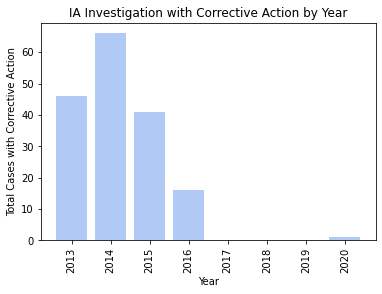

In [ ]:
plt.bar(df_correctiveplotsum.Year, df_correctiveplotsum.Count, facecolor='cornflowerblue', alpha=0.5, )
plt.title('IA Investigation with Corrective Action by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases with Corrective Action')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Total')

<Figure size 1440x720 with 0 Axes>

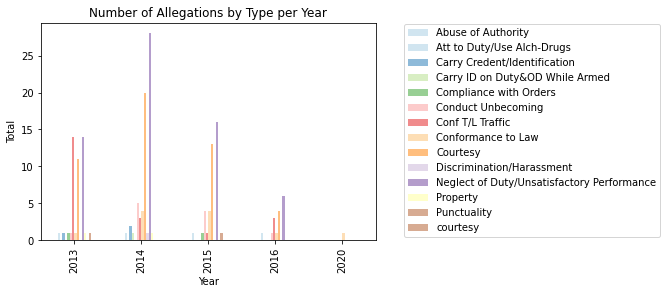

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
plt.figure(figsize=(20,10))
ax = df_correctiveplot.groupby(['Year', 'allegation'])['Count'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.5)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.07, 1.018])

plt.title('Number of Allegations by Type per Year')
plt.xlabel('Year')
plt.ylabel('Total')

In [ ]:
df_no_corrective=df[(df['finding']=="No Corrective Action Tak")]
df_no_corrective.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
95,20-0026,2020-02-05,External,Neglect of Duty/Unsatisfactory Performance,Active,No Corrective Action Tak,2020
193,15-0140,2015-08-04,External,Conduct Unbecoming,Completed,No Corrective Action Tak,2015
195,14-0220,2014-11-05,External,Courtesy,Completed,No Corrective Action Tak,2014
196,14-0159,2014-07-28,External,Neglect of Duty/Unsatisfactory Performance,Completed,No Corrective Action Tak,2014
200,15-0227,2015-12-21,External,Neglect of Duty/Unsatisfactory Performance,Completed,No Corrective Action Tak,2015


In [ ]:
df_no_correctiveplot = pd.DataFrame(df_no_corrective.groupby(["Year"])['allegation'].value_counts())
df_no_correctiveplot

allegation
Year allegation                                            
2013 Courtesy                                            22
     Neglect of Duty/Unsatisfactory Performance          20
     Conf T/L Traffic                                     6
     Abuse of Authority                                   5
     Carry Credent/Identification                         1
     Conduct Unbecoming                                   1
2014 Neglect of Duty/Unsatisfactory Performance          56
     Courtesy                                            33
     Conduct Unbecoming                                   6
     Conf T/L Traffic                                     6
     Conformance to Law                                   4
     Abuse of Authority                                   3
     Carry Credent/Identification                         1
     Carry ID on Duty&OD While Armed                      1
     Discrim/Race/Sex                                     1
     Secondary Employment                                 1
     Use of Force                                         1
     courtesy                                             1
2015 Neglect of Duty/Unsatisfactory Performance          34
     Courtesy                                            26
     Conformance to Law                                  11
     Conduct Unbecoming                                   6
     Discrimination/Harassment                            3
     Abuse of Authority                                   1
     Abuse of Process                                     1
     Carry Credent/Identification                         1
     Conf T/L Traffic                                     1
     Property                                             1
2016 Conformance to Law                                   5
     Neglect of Duty/Unsatisfactory Performance           5
     Courtesy                                             4
     Abuse of Authority                                   3
     Conf T/L Traffic                                     3
     Discrim/Race/Sex                                     1
2020 Neglect of Duty/Unsatisfactory Performance           1

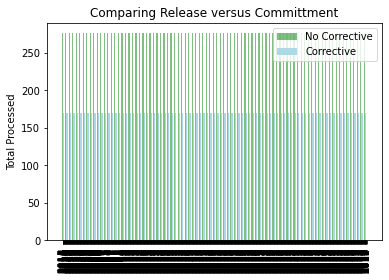

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = df.Year
No_Corrective = df_no_corrective.finding.count()
Corrective = df_corrective.finding.count()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, No_Corrective, width, label='No Corrective',color='green', alpha = 0.5)
rects2= ax.bar(x + width/2, Corrective, width, label='Corrective', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Processed')
ax.set_title('Comparing Release versus Committment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.xticks(rotation=90)
plt.show()

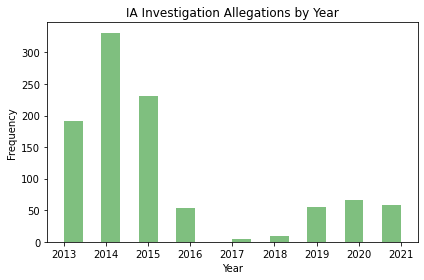

In [ ]:
plt.hist(df.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Allegations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('AI_by_year.png', dpi=300, bbox_inches = 'tight')

plt.show()

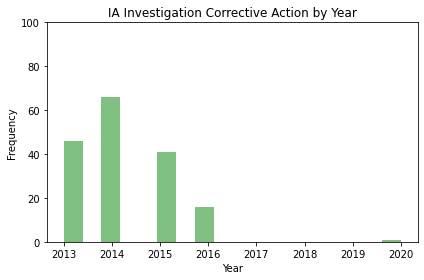

In [ ]:
plt.hist(df_corrective.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Corrective Action by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 100)
plt.tight_layout()
plt.show()

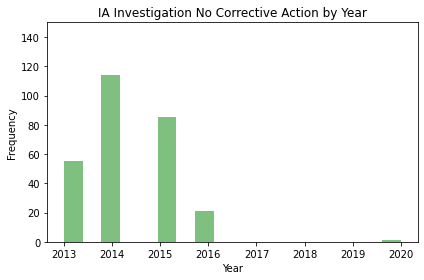

In [ ]:
plt.hist(df_no_corrective.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation No Corrective Action by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 150)
plt.tight_layout()
plt.show()

In [ ]:
df.count()

filenum            1000
created_dt         1000
source             1000
allegation          997
incident_status    1000
finding             822
Year               1000
dtype: int64

In [ ]:
df_corrective.count()

filenum            170
created_dt         170
source             170
allegation         170
incident_status    170
finding            170
Year               170
dtype: int64

In [ ]:
df_no_corrective.count()

filenum            276
created_dt         276
source             276
allegation         276
incident_status    276
finding            276
Year               276
dtype: int64

In [ ]:
df_active=df[(df['incident_status']=="Active")]
df_active.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
3,16-0101,2016-05-10,Internal,Conformance to Law,Active,NaN,2016
4,15-0200,2015-11-09,External,Courtesy,Active,NaN,2015


In [ ]:
df_active.count()

filenum            191
created_dt         191
source             191
allegation         191
incident_status    191
finding             16
Year               191
dtype: int64

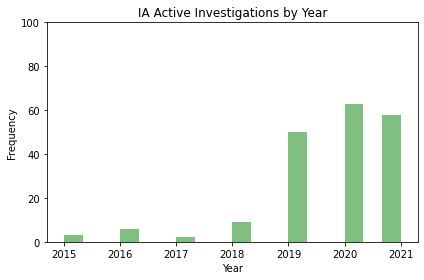

In [ ]:
plt.hist(df_active.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Active Investigations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 100)
plt.tight_layout()
plt.show()

In [ ]:
df_completed=df[(df['incident_status']=="Completed")]
df_completed.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
191,14-0115,2014-06-02,External,Neglect of Duty/Unsatisfactory Performance,Completed,Sustained,2014
192,14-0141,2014-07-01,Internal,Use of Force,Completed,Exonerated,2014
193,15-0140,2015-08-04,External,Conduct Unbecoming,Completed,No Corrective Action Tak,2015
194,15-0191,2015-10-22,External,Abuse of Authority,Completed,Administrative Closure,2015
195,14-0220,2014-11-05,External,Courtesy,Completed,No Corrective Action Tak,2014


In [ ]:
df_completed.count()

filenum            809
created_dt         809
source             809
allegation         806
incident_status    809
finding            806
Year               809
dtype: int64

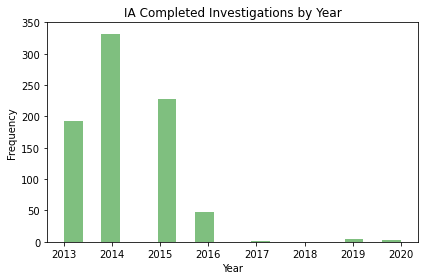

In [ ]:
plt.hist(df_completed.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Completed Investigations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 350)
plt.tight_layout()
plt.show()

In [ ]:
# percent corrective action
df.count()
#df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100

filenum            1000
created_dt         1000
source             1000
allegation          997
incident_status    1000
finding             822
Year               1000
dtype: int64

In [ ]:
df_corrective.count()


filenum            170
created_dt         170
source             170
allegation         170
incident_status    170
finding            170
Year               170
dtype: int64

In [ ]:
170/1000 * 100

17.0

Only **17%** of Allegations have resulted in corrective action.

##**Statistical Analysis**

In [ ]:
df.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
3,16-0101,2016-05-10,Internal,Conformance to Law,Active,NaN,2016
4,15-0200,2015-11-09,External,Courtesy,Active,NaN,2015


In [ ]:
from scipy.stats import chi2_contingency 
import numpy as np

chisqt = pd.crosstab(df.allegation, df.finding, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=634.161, p=0.000000000
Probably dependent


In [ ]:
chisqt = pd.crosstab(df.allegation, df.finding, margins=True)
chisqt

finding,Administrative Closure,Corrective Action Taken,Declined,Exonerated,Insufficent Evidence,No Corrective Action Tak,Policy Failure,Sustained,Unfounded,All
allegation,,,,,,,,,,
Absent W/O Leave,2,0,0,0,0,0,0,0,0,2
Abuse of Authority,6,3,4,2,0,12,0,0,3,30
Abuse of Process,1,0,1,0,0,1,0,2,1,6
Att to Duty/Use Alch-Drugs,0,1,0,0,0,0,0,1,0,2
Carry Credent/Identification,1,3,0,1,0,3,0,0,0,8
Carry ID on Duty&OD While Armed,0,1,0,0,0,1,0,0,0,2
Compliance with Orders,0,2,0,0,0,0,0,2,0,4
Conduct Unbecoming,17,11,3,8,5,13,0,9,4,70
Conf T/L Traffic,0,21,1,0,0,16,0,0,0,38


In [ ]:
import pandas as pd
import scipy.stats as stats


stats.chi2_contingency(chisqt)

(634.1607093387358,
 2.4421603253385027e-31,
 270,
 array([[3.04136253e-01, 4.13625304e-01, 1.14355231e-01, 1.87347932e-01,
         5.35279805e-02, 6.71532847e-01, 4.86618005e-03, 1.53284672e-01,
         9.73236010e-02, 2.00000000e+00],
        [4.56204380e+00, 6.20437956e+00, 1.71532847e+00, 2.81021898e+00,
         8.02919708e-01, 1.00729927e+01, 7.29927007e-02, 2.29927007e+00,
         1.45985401e+00, 3.00000000e+01],
        [9.12408759e-01, 1.24087591e+00, 3.43065693e-01, 5.62043796e-01,
         1.60583942e-01, 2.01459854e+00, 1.45985401e-02, 4.59854015e-01,
         2.91970803e-01, 6.00000000e+00],
        [3.04136253e-01, 4.13625304e-01, 1.14355231e-01, 1.87347932e-01,
         5.35279805e-02, 6.71532847e-01, 4.86618005e-03, 1.53284672e-01,
         9.73236010e-02, 2.00000000e+00],
        [1.21654501e+00, 1.65450122e+00, 4.57420925e-01, 7.49391727e-01,
         2.14111922e-01, 2.68613139e+00, 1.94647202e-02, 6.13138686e-01,
         3.89294404e-01, 8.00000000e+00],
        [

There is a relationship between [Variable1] and [Variable2], X2(Degrees of Freedom - number 3 (270) above) = (number 1 above), p(number 2 above)< 0.0001.

In [ ]:
force=df[(df['allegation']=="Use of Force")]
force

,filenum,created_dt,source,allegation,incident_status,finding,Year
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
17,19-0093,2019-06-10,External,Use of Force,Active,Unfounded,2019
25,18-0137,2018-08-20,External,Use of Force,Active,NaN,2018
29,20-0090,2020-05-27,Internal,Use of Force,Active,NaN,2020
39,19-0066,2019-04-09,External,Use of Force,Active,NaN,2019
40,19-0065,2019-04-08,Internal,Use of Force,Active,NaN,2019
53,19-0093,2019-06-10,External,Use of Force,Active,NaN,2019
58,20-0103,2020-06-08,Internal,Use of Force,Active,NaN,2020
62,18-0137,2018-08-20,External,Use of Force,Active,Administrative Closure,2018
65,20-0106,2020-06-15,Internal,Use of Force,Active,NaN,2020


In [ ]:
forceplot = pd.DataFrame(force.finding.value_counts())
forceplot

,finding
Exonerated,22
Administrative Closure,9
Unfounded,6
Declined,3
Insufficent Evidence,2
No Corrective Action Tak,1


In [ ]:
forceplot.reset_index(level=0, inplace=True)
forceplot

,index,finding
0,Exonerated,22
1,Administrative Closure,9
2,Unfounded,6
3,Declined,3
4,Insufficent Evidence,2
5,No Corrective Action Tak,1


In [ ]:
forceplot.rename(columns={'index': 'Finding', 'finding': 'Count'}, inplace=True)
forceplot

,Finding,Count
0,Exonerated,22
1,Administrative Closure,9
2,Unfounded,6
3,Declined,3
4,Insufficent Evidence,2
5,No Corrective Action Tak,1


In [ ]:
forceplot.Count.sum()

43

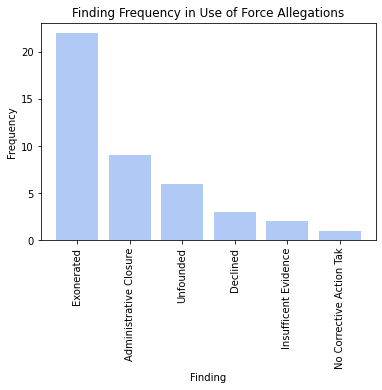

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.bar(forceplot.Finding, forceplot.Count, facecolor='cornflowerblue', alpha=0.5, )
plt.title('Finding Frequency in Use of Force Allegations')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.savefig('Use_of_force.png', dpi=300, bbox_inches = 'tight')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Corrective Action was taken in **0 out of 43** Use of Force Allegation cases.

In [ ]:
abuseauth=df[(df['allegation']=="Abuse of Authority")]
abuseauth

,filenum,created_dt,source,allegation,incident_status,finding,Year
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
194,15-0191,2015-10-22,External,Abuse of Authority,Completed,Administrative Closure,2015
251,13-0290,2013-10-24,External,Abuse of Authority,Completed,No Corrective Action Tak,2013
255,13-0291,2013-10-24,External,Abuse of Authority,Completed,Declined,2013
286,13-0262,2013-09-24,Internal,Abuse of Authority,Completed,Corrective Action Taken,2013
296,13-0323,2013-12-03,External,Abuse of Authority,Completed,No Corrective Action Tak,2013
374,13-0255,2013-09-17,External,Abuse of Authority,Completed,Exonerated,2013
389,14-0061,2014-04-03,External,Abuse of Authority,Completed,No Corrective Action Tak,2014
394,15-0176,2015-09-23,Internal,Abuse of Authority,Completed,Administrative Closure,2015
424,15-0051,2015-03-26,External,Abuse of Authority,Completed,Declined,2015


In [ ]:
abuseauthplot = pd.DataFrame(abuseauth.finding.value_counts())
abuseauthplot

,finding
No Corrective Action Tak,12
Administrative Closure,6
Declined,4
Corrective Action Taken,3
Unfounded,3
Exonerated,2


In [ ]:
abuseauthplot.reset_index(level=0, inplace=True)
abuseauthplot

,index,finding
0,No Corrective Action Tak,12
1,Administrative Closure,6
2,Declined,4
3,Corrective Action Taken,3
4,Unfounded,3
5,Exonerated,2


In [ ]:
abuseauthplot.rename(columns={'index': 'Finding', 'finding': 'Count'}, inplace=True)
abuseauthplot

,Finding,Count
0,No Corrective Action Tak,12
1,Administrative Closure,6
2,Declined,4
3,Corrective Action Taken,3
4,Unfounded,3
5,Exonerated,2


In [ ]:
abuseauthplot.Count.sum()

30

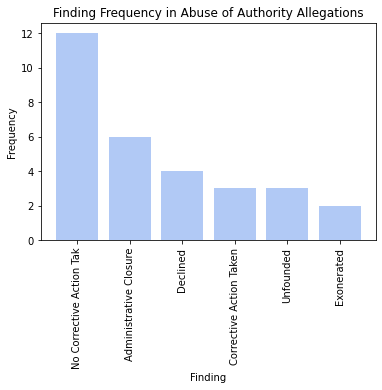

In [ ]:
plt.bar(abuseauthplot.Finding, abuseauthplot.Count, facecolor='cornflowerblue', alpha=0.5 )
plt.title('Finding Frequency in Abuse of Authority Allegations')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.savefig('Abuse_Authority.png', dpi=300, bbox_inches = 'tight')

plt.show()

Corrective Action was taken in only **3 out of 30** Abuse of Authority Allegation cases.

In [ ]:
170/829

0.20506634499396864

In [ ]:
64+48

112

Overall only **170 out of 829** total allegations received any form of corrective action.  We have no available data on what the exact forms of corrective action were.

In [ ]:
170/829 * 100

20.506634499396863

In [ ]:
3/30 * 100

10.0

In [ ]:
df_external = df[(df["source"] == 'External')]
df_external.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015
4,15-0200,2015-11-09,External,Courtesy,Active,NaN,2015
5,15-0200,2015-11-09,External,Conduct Unbecoming,Active,NaN,2015
9,19-0093,2019-06-10,External,Courtesy,Active,Administrative Closure,2019
10,17-0022,2017-02-02,External,Neglect of Duty/Unsatisfactory Performance,Active,Declined,2017


In [ ]:
df_external.value_counts

<bound method DataFrame.value_counts of      filenum created_dt  ...                   finding  Year
0    15-0200 2015-11-09  ...                       NaN  2015
4    15-0200 2015-11-09  ...                       NaN  2015
5    15-0200 2015-11-09  ...                       NaN  2015
9    19-0093 2019-06-10  ...    Administrative Closure  2019
10   17-0022 2017-02-02  ...                  Declined  2017
..       ...        ...  ...                       ...   ...
994  13-0294 2013-10-24  ...   Corrective Action Taken  2013
995  15-0014 2015-02-03  ...   Corrective Action Taken  2015
996  15-0152 2015-08-20  ...   Corrective Action Taken  2015
997  15-0009 2015-01-23  ...   Corrective Action Taken  2015
998  13-0242 2013-09-09  ...  No Corrective Action Tak  2013

[676 rows x 7 columns]>

In [ ]:
df_external_corr = df_external[(df_external["finding"] == 'Corrective Action Taken')]
print(df_external_corr.value_counts)

<bound method DataFrame.value_counts of      filenum created_dt  ...                  finding  Year
155  20-0216 2020-12-21  ...  Corrective Action Taken  2020
199  14-0060 2014-03-27  ...  Corrective Action Taken  2014
201  13-0268 2013-09-26  ...  Corrective Action Taken  2013
204  15-0161 2015-09-08  ...  Corrective Action Taken  2015
205  13-0351 2014-01-02  ...  Corrective Action Taken  2014
..       ...        ...  ...                      ...   ...
993  15-0016 2015-02-10  ...  Corrective Action Taken  2015
994  13-0294 2013-10-24  ...  Corrective Action Taken  2013
995  15-0014 2015-02-03  ...  Corrective Action Taken  2015
996  15-0152 2015-08-20  ...  Corrective Action Taken  2015
997  15-0009 2015-01-23  ...  Corrective Action Taken  2015

[145 rows x 7 columns]>


In [ ]:
145/676 *100

21.449704142011836

In [ ]:
df_internal = df[(df["source"] == 'Internal')]
df_internal.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
3,16-0101,2016-05-10,Internal,Conformance to Law,Active,NaN,2016
6,16-0101,2016-05-10,Internal,Att to Duty/Use Alch-Drugs,Active,NaN,2016
7,16-0196,2016-08-17,Internal,Conformance to Law,Active,NaN,2016


In [ ]:
df_internal.value_counts

<bound method DataFrame.value_counts of      filenum created_dt  ...                   finding  Year
1    16-0101 2016-05-10  ...                       NaN  2016
2    16-0101 2016-05-10  ...                       NaN  2016
3    16-0101 2016-05-10  ...                       NaN  2016
6    16-0101 2016-05-10  ...                       NaN  2016
7    16-0196 2016-08-17  ...                       NaN  2016
..       ...        ...  ...                       ...   ...
973  15-0213 2015-11-25  ...   Corrective Action Taken  2015
974  13-0311 2013-11-19  ...                Exonerated  2013
975  15-0131 2015-07-21  ...    Administrative Closure  2015
982  15-0005 2015-01-08  ...  No Corrective Action Tak  2015
999  14-0202 2014-10-10  ...                Exonerated  2014

[324 rows x 7 columns]>

In [ ]:
df_internal_corr = df_internal[(df_internal["finding"] == 'Corrective Action Taken')]
print(df_internal_corr.value_counts)

<bound method DataFrame.value_counts of      filenum created_dt  ...                  finding  Year
209  14-0191 2014-09-24  ...  Corrective Action Taken  2014
212  14-0143 2014-07-02  ...  Corrective Action Taken  2014
216  13-0328 2013-12-04  ...  Corrective Action Taken  2013
240  15-0108 2015-06-18  ...  Corrective Action Taken  2015
252  15-0121 2015-07-01  ...  Corrective Action Taken  2015
253  15-0121 2015-07-01  ...  Corrective Action Taken  2015
286  13-0262 2013-09-24  ...  Corrective Action Taken  2013
311  16-0048 2016-03-07  ...  Corrective Action Taken  2016
329  14-0234 2014-12-11  ...  Corrective Action Taken  2014
341  13-0262 2013-09-24  ...  Corrective Action Taken  2013
357  16-0060 2016-03-16  ...  Corrective Action Taken  2016
364  14-0009 2014-01-15  ...  Corrective Action Taken  2014
630  16-0051 2016-03-08  ...  Corrective Action Taken  2016
633  14-0143 2014-07-02  ...  Corrective Action Taken  2014
635  16-0019 2016-02-01  ...  Corrective Action Taken  2016


In [ ]:
25/324 * 100

7.716049382716049

In [ ]:
df_internal_abuse = df[(df["source"] == 'Internal') & (df['allegation'] == 'Abuse of Authority')]
df_internal_abuse.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
286,13-0262,2013-09-24,Internal,Abuse of Authority,Completed,Corrective Action Taken,2013
394,15-0176,2015-09-23,Internal,Abuse of Authority,Completed,Administrative Closure,2015
681,14-0056,2014-03-19,Internal,Abuse of Authority,Completed,No Corrective Action Tak,2014
959,17-0286,2017-12-14,Internal,Abuse of Authority,Completed,Administrative Closure,2017


In [ ]:
df_internal_abuse.value_counts

<bound method DataFrame.value_counts of      filenum created_dt  ...                   finding  Year
2    16-0101 2016-05-10  ...                       NaN  2016
286  13-0262 2013-09-24  ...   Corrective Action Taken  2013
394  15-0176 2015-09-23  ...    Administrative Closure  2015
681  14-0056 2014-03-19  ...  No Corrective Action Tak  2014
959  17-0286 2017-12-14  ...    Administrative Closure  2017
982  15-0005 2015-01-08  ...  No Corrective Action Tak  2015

[6 rows x 7 columns]>

In [ ]:
df_external_abuse = df[(df["source"] == 'External') & (df['allegation'] == 'Abuse of Authority')]
df_external_abuse.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
194,15-0191,2015-10-22,External,Abuse of Authority,Completed,Administrative Closure,2015
251,13-0290,2013-10-24,External,Abuse of Authority,Completed,No Corrective Action Tak,2013
255,13-0291,2013-10-24,External,Abuse of Authority,Completed,Declined,2013
296,13-0323,2013-12-03,External,Abuse of Authority,Completed,No Corrective Action Tak,2013
374,13-0255,2013-09-17,External,Abuse of Authority,Completed,Exonerated,2013


In [ ]:
df_external_abuse.value_counts

<bound method DataFrame.value_counts of      filenum created_dt  ...                   finding  Year
194  15-0191 2015-10-22  ...    Administrative Closure  2015
251  13-0290 2013-10-24  ...  No Corrective Action Tak  2013
255  13-0291 2013-10-24  ...                  Declined  2013
296  13-0323 2013-12-03  ...  No Corrective Action Tak  2013
374  13-0255 2013-09-17  ...                Exonerated  2013
389  14-0061 2014-04-03  ...  No Corrective Action Tak  2014
424  15-0051 2015-03-26  ...                  Declined  2015
442  15-0160 2015-09-03  ...    Administrative Closure  2015
487  14-0012 2014-01-29  ...                 Unfounded  2014
488  16-0032 2016-02-16  ...  No Corrective Action Tak  2016
508  15-0113 2015-06-29  ...    Administrative Closure  2015
581  15-0081 2015-05-07  ...   Corrective Action Taken  2015
598  14-0044 2014-03-06  ...                 Unfounded  2014
602  15-0061 2015-04-15  ...    Administrative Closure  2015
664  14-0050 2014-03-14  ...                 

In [ ]:
df_external_abuse_corr = df_external_abuse[(df_external_abuse["finding"] == 'Corrective Action Taken')]
print(df_external_abuse_corr.value_counts)

<bound method DataFrame.value_counts of      filenum created_dt  ...                  finding  Year
581  15-0081 2015-05-07  ...  Corrective Action Taken  2015
947  14-0066 2014-04-04  ...  Corrective Action Taken  2014

[2 rows x 7 columns]>


In [ ]:
df_internal_force = df[(df["source"] == 'Internal') & (df['allegation'] == 'Use of Force')]
df_internal_force.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
29,20-0090,2020-05-27,Internal,Use of Force,Active,NaN,2020
40,19-0065,2019-04-08,Internal,Use of Force,Active,NaN,2019
58,20-0103,2020-06-08,Internal,Use of Force,Active,NaN,2020
65,20-0106,2020-06-15,Internal,Use of Force,Active,NaN,2020


In [ ]:
df_internal_force.value_counts

<bound method DataFrame.value_counts of      filenum created_dt    source  ... incident_status                 finding  Year
1    16-0101 2016-05-10  Internal  ...          Active                     NaN  2016
29   20-0090 2020-05-27  Internal  ...          Active                     NaN  2020
40   19-0065 2019-04-08  Internal  ...          Active                     NaN  2019
58   20-0103 2020-06-08  Internal  ...          Active                     NaN  2020
65   20-0106 2020-06-15  Internal  ...          Active                     NaN  2020
71   19-0160 2019-09-10  Internal  ...          Active                     NaN  2019
90   20-0038 2020-02-13  Internal  ...          Active                     NaN  2020
97   20-0063 2020-03-16  Internal  ...          Active                     NaN  2020
137  21-0011 2021-01-19  Internal  ...          Active                     NaN  2021
192  14-0141 2014-07-01  Internal  ...       Completed              Exonerated  2014
345  14-0025 2014-02-06  

In [ ]:
df_internal_force_corr = df_internal_force[(df_internal_force["finding"] == 'Corrective Action Taken')]
print(df_internal_force_corr.value_counts)

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [filenum, created_dt, source, allegation, incident_status, finding, Year]
Index: []>
